In [180]:
import json
import re
import numpy as np
from sklearn import decomposition
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
from collections import defaultdict

In [367]:
filepath = 'data/tag_vectors.json'
with open(filepath, 'r') as file:
    tag_vectors = json.load(file)

X_labeled = list(zip(*tag_vectors.items()))
X = np.array(X_labeled[1])
Y = cosine_similarity(X)

# Creating a mask so argmax does not cause product to return itself.
n = len(Y)
Y_mask = [list([False] * n) for y in Y]
for i in range(n):
    Y_mask[i][i] = True
Y = np.ma.MaskedArray(Y, Y_mask)

selected_id = '244430'
selected_index = X_labeled[0].index(selected_id)
recommended_index = np.argmax(Y[selected_index])
recommended_id = X_labeled[0][recommended_index]

filename = 'data/processed_games.json'
with open(filename, 'r') as file:
    games = json.load(file)

selected = [game for game in games if game['id'] == selected_id][0]
recommended = [game for game in games if game['id'] == recommended_id][0]

# PCA

X = np.array(list(tag_vectors.values()))

selected_vector_index = [i for i, id_ in enumerate(tag_vectors) if id_ == selected_id][0]
recommended_vector_index = [i for i, id_ in enumerate(tag_vectors) if id_ == recommended_id][0]

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
x, y = X.T
i, j = X[selected_vector_index].T
k, m = X[recommended_vector_index].T

z = Y[selected_vector_index]
q4 = z >= np.quantile(z, .75)

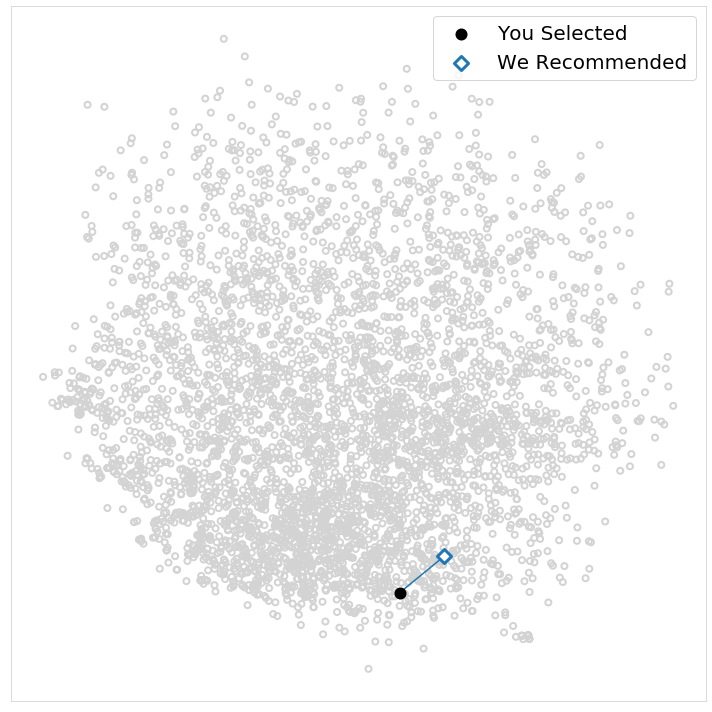

In [369]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, zorder=0, facecolors='none', edgecolors='lightgray', linewidth=2)
ax.plot([i, k], [j, m], zorder=2, c='tab:blue')
ax.scatter(i, j, zorder=3, s=100, marker='o', facecolors='black', edgecolors='black', linewidth=2, label='You Selected')
ax.scatter(k, m, zorder=4, s=100, marker='D', facecolors='white', edgecolors='tab:blue', linewidth=3, label='We Recommended')
ax.legend(fontsize=20, loc='upper right')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.setp(ax.spines.values(), color='lightgray')

fig.tight_layout();

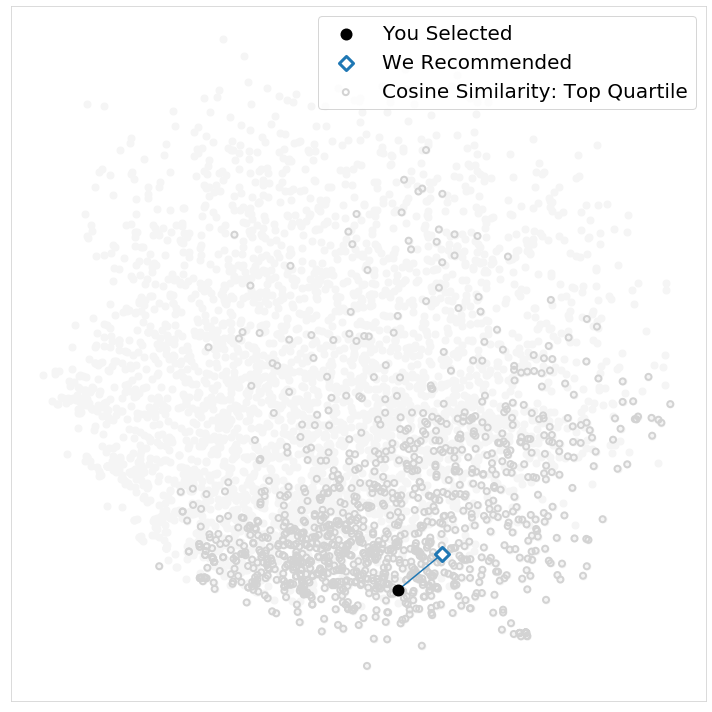

In [378]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, zorder=0, facecolors='whitesmoke', edgecolors='whitesmoke', linewidth=2)
ax.plot([i, k], [j, m], zorder=2, c='tab:blue')
ax.scatter(i, j, zorder=3, s=100, marker='o', facecolors='black', edgecolors='black', linewidth=2, label='You Selected')
ax.scatter(k, m, zorder=4, s=100, marker='D', facecolors='white', edgecolors='tab:blue', linewidth=3, label='We Recommended')
ax.scatter(x[q4], y[q4], zorder=1, facecolors='none', edgecolors='lightgray', linewidth=2, label='Cosine Similarity: Top Quartile')
ax.legend(fontsize=20, loc='upper right')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.setp(ax.spines.values(), color='lightgray')

fig.tight_layout();

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, zorder=0, facecolors='none', edgecolors='lightgray', linewidth=2)
ax.plot([i, k], [j, m], zorder=2, c='tab:blue')
ax.scatter(i, j, zorder=3, s=100, marker='o', facecolors='black', edgecolors='black', linewidth=2, label='You Selected')
ax.scatter(k, m, zorder=4, s=100, marker='D', facecolors='white', edgecolors='tab:blue', linewidth=3, label='We Recommended')
ax.legend(fontsize=20, loc='upper right')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.setp(ax.spines.values(), color='lightgray')

fig.tight_layout();

In [408]:
filepath = 'data/tag_corpus.json'
with open(filepath, 'r') as file:
    tag_corpus = json.load(file)

pca_variance = np.array([np.abs(i[0]) + np.abs(i[1]) for i in pca.components_.T])
pca_order = pca_variance.argsort()[::-1]

selected_tag_filter = np.array(tag_vectors[selected_id]).astype(bool)[pca_order]
selected_tag_choices = np.array(tag_corpus)[pca_order]
selected_tag_choices = selected_tag_choices[selected_tag_filter]

recommended_tag_filter = np.array(tag_vectors[recommended_id]).astype(bool)[pca_order]
recommended_tag_choices = np.array(tag_corpus)[pca_order]
recommended_tag_choices = recommended_tag_choices[recommended_tag_filter]

tag_choices = [tag for tag in selected_tag_choices if tag in recommended_tag_choices]

In [484]:
selected_tag = 'femaleprotagonist'

filepath = 'data/bag_of_tags.json'
with open(filepath, 'r') as file:
    bag_of_tags = json.load(file)

with_tag_game = [id_ for id_, tags in bag_of_tags.items() if selected_tag in tags]
with_tag_index = [X_labeled[0].index(game) for game in with_tag_game]

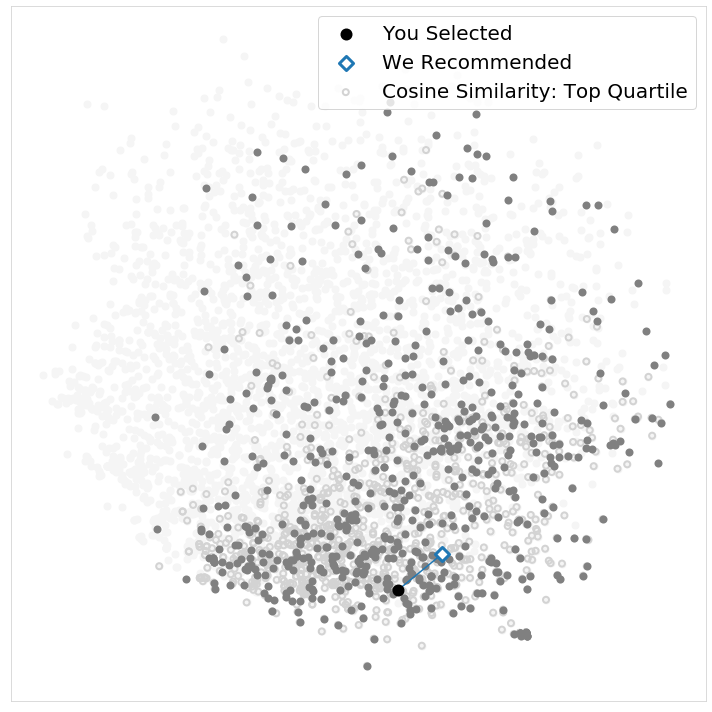

In [485]:
# Plot: Selected and Recommended with top quartile conveyed.
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, zorder=0, facecolors='whitesmoke', edgecolors='whitesmoke', linewidth=2)
ax.plot([i, k], [j, m], zorder=3, c='tab:blue')
ax.scatter(i, j, zorder=4, s=100, marker='o', facecolors='black', edgecolors='black', linewidth=2, label='You Selected')
ax.scatter(k, m, zorder=5, s=100, marker='D', facecolors='white', edgecolors='tab:blue', linewidth=3, label='We Recommended')
ax.scatter(x[q4], y[q4], zorder=1, facecolors='none', 
           edgecolors='lightgray', linewidth=2, label='Cosine Similarity: Top Quartile')
ax.scatter(x[with_tag_index], y[with_tag_index], zorder=2, facecolors='gray', edgecolors='gray', linewidth=2)
ax.legend(fontsize=20, loc='upper right')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.setp(ax.spines.values(), color='lightgray')
fig.tight_layout()